# Plotting color images with matplotlib


## learning objectives

  * introduce color plotting with colomaps and pcolormesh
  * provide a set of links for future reference about using color to interpret/present image data

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## read in some satellite data

Get a compressed npz archive that holds two [modis](https://modis.gsfc.nasa.gov/about/specifications.php) brightness temperature maps (Kelvins) for Channel 31 and 32.

In [2]:
temp_dict = np.load('./sat_temps.npz')
list(temp_dict.keys())

['chan31', 'chan32']

## Histogram to see the data range

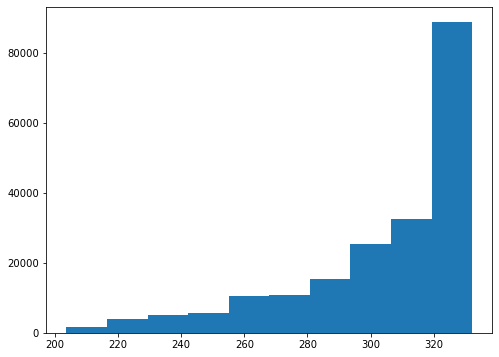

In [3]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.hist(temp_dict['chan31'].flat);

## Producing pseudocolor images

For reference: some background about colormaps (aka palettes) and human color vision
 
* matplotlib

  * we'll use [pcolormesh](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html)

  * [matplotlib image tutorial](https://matplotlib.org/stable/tutorials/introductory/images.html)
 
  * [matplotlib colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html)
  
  * [32 bit true color vs. 8 bit colormaps](https://www.computerhope.com/issues/ch001557.htm)
  
* physiology and psychology of color vision in humans

  * [rods, cones and rgb](https://www.healthline.com/health/tetrachromacy)
  
  * [colorblindness](https://www.colourblindawareness.org/colour-blindness/)

  * [xkcd color survey](https://blog.xkcd.com/2010/05/03/color-survey-results/)

  * [xkcd colors from matplotlib](https://seaborn.pydata.org/generated/seaborn.xkcd_palette.html)

  * [wikipedia article on RGB colors](https://en.wikipedia.org/wiki/RGB_color_model)

  * [the dress](https://en.wikipedia.org/wiki/The_dress)

## Normalizing a colormap

* We can set the datarange that we want to map onto the colors in a particular colormap, using the
  [Normalize object](https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.Normalize.html)
  
* We can set colors for out-of-range and missing data using the `set_over`, `set_under` and `set_bad` 
  methods of the [colormap object](https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.Colormap.html)

In [4]:
import copy
pal = copy.copy(plt.get_cmap("autumn"))
pal.set_bad("0.75")  # 75% grey for out-of-map cells
pal.set_over("w")  # color cells > vmax white
pal.set_under("k")  # color cells < vmin black
vmin = 200.
vmax = 400.
from matplotlib.colors import Normalize

the_norm = Normalize(vmin=vmin, vmax=vmax, clip=False)

## Plotting using pcolormesh

Here's the chan31 temperatures plotted with pcolormesh with the above normalization and the autumn palette.

* [pcolormesh reference](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.pcolormesh.html?highlight=pcolormesh#matplotlib.axes.Axes.pcolormesh)

<class 'matplotlib.collections.QuadMesh'>


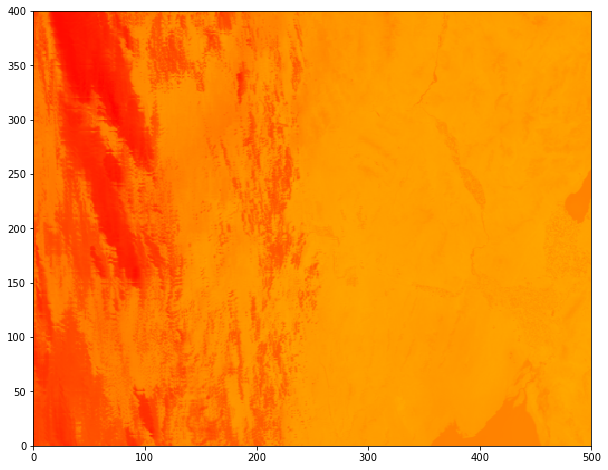

In [5]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
col = ax.pcolormesh(temp_dict['chan31'], cmap = pal, norm = the_norm)
print(type(col))

## Adding a colorbar

* Now add a standard colobar to the figure.  The colorbar size can be reduced with the `shrink` keyword and
  the space between the colorbar and the image can be adjusted with the `pad` keyword.  We can also label the
  colorbar and adjust its alignment using `verticalalignment` and `rotation`
  

* [colorbar reference](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html)

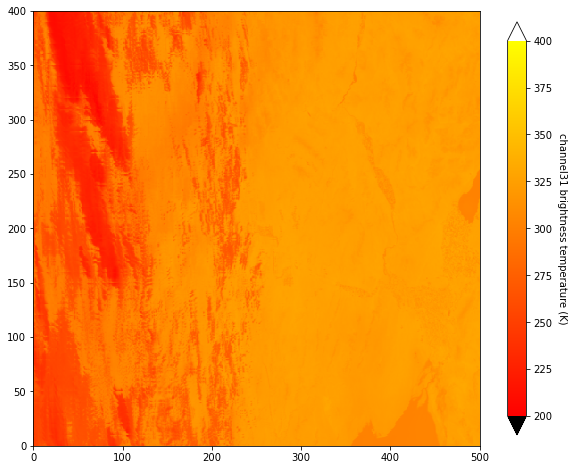

In [6]:
colorbar=fig.colorbar(col, shrink=0.95, pad=0.05,extend='both')
colorbar.set_label('channel31 brightness temperature (K)',rotation=-90,verticalalignment='bottom')
display(fig)

## Specifying over/under/bad values

Make a new image with temperatures below 250 set to missing, and all colors mapped to 310 K - 330 K

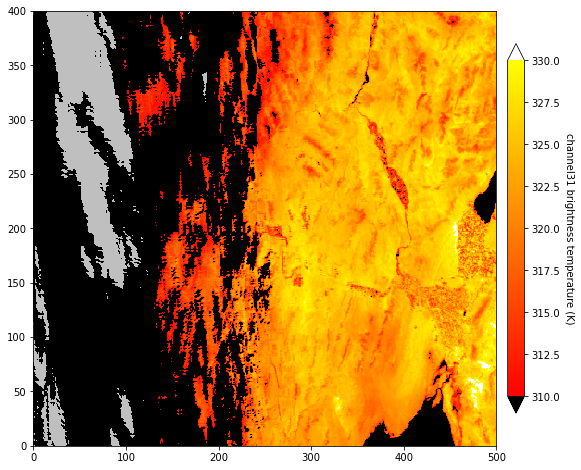

In [7]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
chan31 = np.array(temp_dict['chan31'])
chan31[chan31 < 250] = np.nan
vmin = 310.
vmax = 330.
the_norm = Normalize(vmin=vmin, vmax=vmax, clip=False)
col = ax.pcolormesh(chan31, cmap = pal, norm = the_norm)
colorbar=fig.colorbar(col, shrink=0.85, pad=0.02,extend='both')
colorbar.set_label('channel31 brightness temperature (K)',rotation=-90,verticalalignment='bottom')

## Your turn

Make a new image of (channel31 - mean(chan31)) and plot that using a [diverging colormap](https://matplotlib.org/stable/tutorials/colors/colormaps.html#diverging) like `coolwarm`.  Don't worry
about normalization for this first pass.

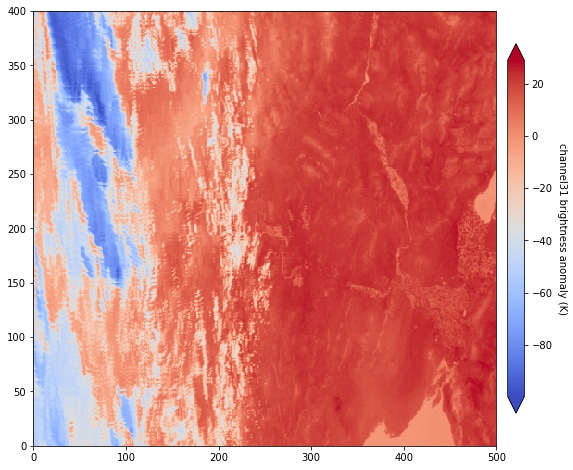

In [8]:
# phil's answer
chan31 = np.array(temp_dict['chan31'])
diff_31 = chan31 - chan31.mean()
pal = copy.copy(plt.get_cmap("coolwarm"))
fig, ax = plt.subplots(1,1,figsize=(10,8))
col = ax.pcolormesh(diff_31, cmap = pal)
colorbar=fig.colorbar(col, shrink=0.85, pad=0.02,extend='both')
colorbar.set_label('channel31 brightness anomaly (K)',rotation=-90,verticalalignment='bottom')

## Make the colorbar range -20 -> 20 K 

We want the blue-red boundary to designate switch from negative to positive

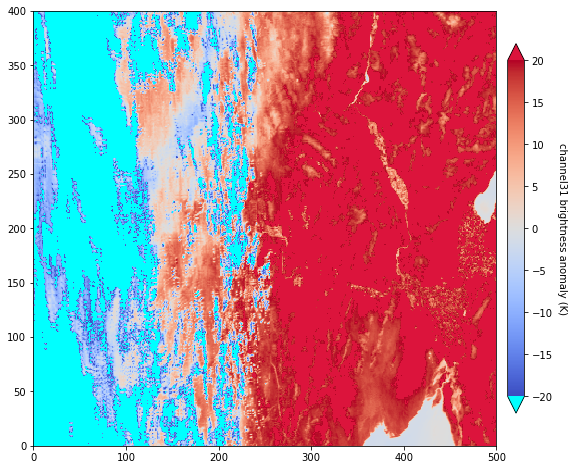

In [9]:
# now normalize
vmin = -20.
vmax =  20.
the_norm = Normalize(vmin=vmin, vmax=vmax, clip=False)
fig, ax = plt.subplots(1,1,figsize=(10,8))
pal.set_bad("0.75")  # 75% grey for out-of-map cells
pal.set_over("crimson")  # color cells > vmax white
pal.set_under("cyan")  # color cells < vmin black
col = ax.pcolormesh(diff_31, cmap = pal, norm = the_norm)
colorbar=fig.colorbar(col, shrink=0.85, pad=0.02,extend='both')
colorbar.set_label('channel31 brightness anomaly (K)',rotation=-90,verticalalignment='bottom')